In [5]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Library

In [7]:
import sys, os, random, pybedtools

import numpy as np
import pandas as pd
import h5py as h5
import matplotlib.pylab as plt

In [10]:
header_path = 'labels.txt'

header_df = pd.read_csv(header_path, sep='\t', header=None)
header_df = header_df.drop(0, axis=1)
header_df.columns = ['labels']

classes = header_df['labels'].tolist()

headers = ["chr", "pos", "snptag", "ref", "var"] + classes

path = "/t1-data/project/fgenomics/jinchaus/rotation/DeepHeam_out/GoF/dh_GoF_variants"

path_ref = path+"/reference_class_scores_dh_GoF.bed"
path_var = path+"/variant_class_scores_dh_GoF.bed"
path_tot = path+"/total_damage_scores_dh_GoF.bed"

ref = pd.read_csv(path_ref, sep='\t', header=None)
var = pd.read_csv(path_var, sep='\t', header=None)
tot = pd.read_csv(path_tot, sep='\t', header=None)

ref.columns = headers
var.columns = headers
tot.columns = headers


In [12]:
d13_cols = [col for col in tot.columns if 'd13' in col]

print(d13_cols)

['assay:ATAC-seq__tag:Don001-ATAC-d13-rep1__description:Don001-ATAC-d13-rep1', 'assay:Histone-ChIP-seq__tag:Don001-H3K27ac-d13-rep1__description:Don001-H3K27ac-d13-rep1', 'assay:TF-ChIP-seq__tag:Don001-CTCF-d13-rep1__description:Don001-CTCF-d13-rep1']


In [13]:
results_DH = pd.DataFrame()
results_DH['ATAC']=tot['assay:ATAC-seq__tag:Don001-ATAC-d13-rep1__description:Don001-ATAC-d13-rep1']

In [14]:
results_DH['H3K27ac'] = tot['assay:Histone-ChIP-seq__tag:Don001-H3K27ac-d13-rep1__description:Don001-H3K27ac-d13-rep1']

In [15]:
results_DH = pd.melt(results_DH)

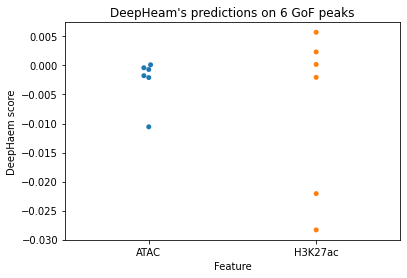

In [16]:
import seaborn as sns

plot = sns.swarmplot(data = results_DH, x = 'variable', y = 'value')
plot.set_xlabel('Feature')
plot.set_ylabel('DeepHaem score')
plot.set_title("DeepHeam's predictions on 6 GoF peaks")
fig = plot.get_figure()
fig.savefig('/datashare/project/fgenomics/jinchaus/rotation/plots/DeepHeam_GoF.png',  bbox_inches='tight', dpi =400)
